
## Implementación_de_una_técnica_de_aprendizaje_máquina_con_el_uso_de_un_framework
### José Carlos Sánchez Gómez A0174050
### 26 de agosto del 2024


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# from google.colab import drive
# drive.mount('/content/drive')

### Separación de los datos en train y test, junto con la declaracion de las tetas y alpha (correción)

In [7]:
data = pd.read_csv('../../..//Valhalla23.csv')
scaler = StandardScaler()
data[['Celsius']] = scaler.fit_transform(data[['Celsius']])

'''
Noté que usando los valores normales de Celsius, SDGRegressor me regresaba la tendencia correcta, pero los valores
eran muy grandes, asi que decidí escalarlos, y se obtuv[].
'''
x_train, x_test, y_train, y_test = train_test_split(data[['Celsius']], data[['Valks']], test_size=0.3)

model = linear_model.SGDRegressor(max_iter = 100, tol = False, alpha= 0.0001)
#model = linear_model.LinearRegression()
model.fit(x_train, y_train)

C:\Users\jcsg6\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(max_iter=100, tol=False)

Se seleccionaron estos hiperparametros de tal forma que el modelo se entrenara con 100 iteraciones, y no termine de entrenarse antes, el valor de alfa se selecciono con base a prueba y error buscando el que diera mejores resultados.

### Entrenamiento del modelo con 100 iteraciones

In [8]:
puntaje_entrenamiento = model.score(x_train, y_train)
puntaje_prueba = model.score(x_test, y_test)

print('Puntaje de entrenamiento:', puntaje_entrenamiento)
print('Puntaje de prueba:', puntaje_prueba)

predicciones = model.predict(x_test)
error_cuadratico_medio = metrics.mean_squared_error(y_test, predicciones)
print('Error cuadrático medio:', error_cuadratico_medio)

Puntaje de entrenamiento: 0.9942228761785792
Puntaje de prueba: 0.9939773251367556
Error cuadrático medio: 39.92649945923386


### Comparando los resultados de los modelos usando los datos de test, contra los valores originales

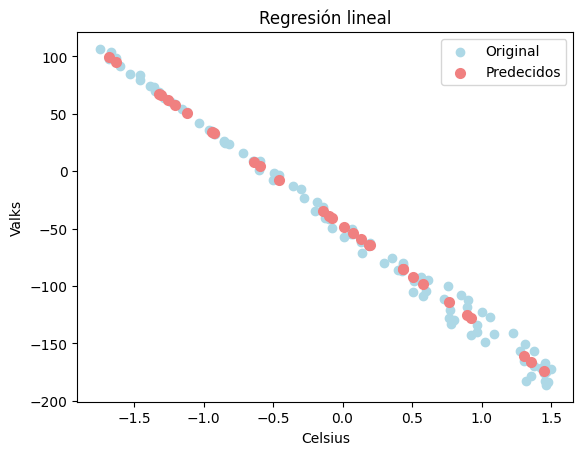

In [9]:
predicciones = model.predict(x_test)
plt.scatter(data['Celsius'], data['Valks'], color = "lightblue")
plt.scatter(x_test, predicciones, color='lightcoral', linewidth=2)
plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.title('Regresión lineal')
plt.legend(["Original", "Predecidos"])
plt.show()

In [6]:
!jupyter nbconvert --to html /content/drive/MyDrive/ColabNotebooks/Retroalimentacion_Modulo2_Framework.ipynb

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/ColabNotebooks/Retroalimentacion_Modulo2_Framework.ipynb' matched no files
